# Introduction to 2D Gravity Modeling
Written by Bradford Mack, University of South Florida. bcmack@usf.edu



## Gravitational acceleration  
  
Newton's law of gravitation can be written as:

$\Large {F=\frac{Gm_{1}m_{2}}{r^{2}}}$

where:  
$F$ is the magnitude of gravitational force.  
$m_{1}$ and $m_{2}$ are masses.  
$r$ is the distance between the two masses.  
$G$ is the gravitational constant $6.67x10^{-11}\frac{Nm^{2}}{kg^{2}}$.  

This formula can be rewritten as $\large a=\frac{Gm_{1}}{r^{2}}$ to show the acceleration of $m_{2}$ due to $m_{1}$ which is useful for modeling variations in gravity at the Earth's surface. These variations are caused by changes in density within the Earth and can be used by scientists investigating buried features such as lava tubes, aquifers, faults, and igneous intrusions. The image below is a gravity anomaly map of the Earth showing large-scale variations collected by NASA's GRACE satellites. Red areas have higher gravity, while blue areas have lower gravity. The units for this map are milligals (mGal) which are $1/100000th$ of a $\large \frac{m}{s^{2}}$.  
  
<img src="./ModuleFiles/EarthGravMap.jpg" alt="Earth Gravity Map" width="600"><cite data-cite="GravMap">(NASA)</cite>

## Collecting Gravity Data  
  
Gravity data is typically collected using portable gravimeters that measure relative gravity rather than absolute gravity. This means that rather than saying point A has a gravitational acceleration of 980000 mGal and point B 980010 mGal, the data only tell us that point B has 10 mGal more than point A. However, this is enough to better understand what is in the subsurface. 
  
Data is collected by placing the gravimeter at a location, leveling it, and letting the instrument record many individual observations. The system gives an average value and standard deviation to give the user an idea of how noisy the data is. Additionally, location data is collected using a high-precision GPS at each site. It is important for the location to be very accurate and precise as a 1-meter change in elevation produces a change in gravity of about 0.3 mGal, which can be quite large relative to the variance in the survey data. The number of points needed and how far apart they are is determined by what the survey target is. For a microgravity survey of a sinkhole, the measurements may be on the order of 1 meter apart while for a large valley, they may be around 1 km apart. It is up to the researcher to plan their survey and ensure they acquire sufficient data to model their target.  
  
Below is a Burris gravimeter (gray box on ground) and RTK GPS antenna while collecting data in Idaho.  
  
<img src="./ModuleFiles/GravSite.png" alt="Gravimeter Site" width="600">  <cite data-cite="Brad Mack">(Brad Mack)</cite>

## Processing Gravity Data  
  
Before any gravity data can be used for modeling, a number of corrections must be applied. These include instrument drift, tidal, theoretical gravity, free air, atmospheric, simple Bouguer, spherical cap, and terrain. **Instrument drift corrections** account for any changes in the measurements due to changes in the instrument itself, such as temperature and changing spring tension. **Tidal corrections** are used to remove the effects of the gravitational pull of the sun and moon. **Theoretical gravity corrections** account for the changing radius of the Earth with latitude as well as the change in centrifugal acceleration. **Free air** correction adjusts for the difference in height relative to the reference ellipsoid and depends on latitude. **Atmospheric correction** removes the effect of the atmosphere's pulling up on the instrument and varies with elevation. **Simple Bouguer correction**, or Bullard A, accounts for the average mass of crust between the base station or ellipsoid and the measurement point given the elevation difference between them. **Spherical cap correction**, or Bullard A+B, accounts for the curvature of the Earth. **Terrain correction** removes the effects of topography, such as a tall mountain nearby pulling up on the instrument.  
  
These corrections serve to eliminate any variation in the data due to anything but changing density in the subsurface. You can think of it like flattening the Earth into a plane so that there are no volume changes around you. Since gravity is a function of mass and we have controlled for volume, any variation in gravity would be from changes in density in the subsurface. However, the corrections are not perfect, and there are always errors and noise in the data.

# 2D Modeling of Gravity Data  




It is sometimes useful to use 2D gravity models to learn about the subsurface. In this case, a 2D model is like a cross section with distance on the x-axis and gravity on the y-axis. Below is an example using data from the Lost River Valley in Idaho. The satellite image is overlain with individual gravity survey points colored by their values and the profile line. The eastern end of the line is near the surface expression of the Lost River Mountain Fault, while the western end crosses the Lone Pine Fault.
  
<img src="./ModuleFiles/GravProfileSatMap.png" alt="Gravity Profile Satellite Map" width="800">  <cite data-cite="Brad Mack">(Brad Mack)</cite>  
  
  
Plotting the gravity data collected in the vicinity of this line produces the upper subplot in the figure below. The lower subplot is the ground surface elevation. 
  

<img src="./ModuleFiles/GravElevProfile.png" alt="Gravity/Elevation Profile" width="800">  <cite data-cite="Brad Mack">(Brad Mack)</cite>

## Detrending
A common next step is to detrend the gravity data to remove any long wavelength signals (i.e. regional trends). In this case, the ends of the line are near the contact between the sediment filling the basin and the surrounding bedrock. Since we've made all of the above corrections before plotting this data, the bedrock should ideally be at 0 mGal. A linear detrend using the high points on either end as our zeroes is one way to correct for this. The assumption that they should be at 0 ignores any errors in the corrections and local variations. It is important to keep this in mind when modeling. Always take some time to consider what assumptions you are making and how they affect your results.  
  
Detrending the data produces the plot below. The upper plot is the original data and the lower is the detrended data. Notice the western end of the line was originally much lower than the eastern end. This is likely due to low-density volcanic rocks at the surface. If we were to assume that the difference between the two high points on either side is only from these volcanic rocks, then the linear detrend would mean a constant increase in thickness of that unit from 0 at the eastern edge to however thick it is at the western edge.
  
*Does this sound like a reasonable assumption?*

*What other factors may be influencing the variation?*
  
<img src="./ModuleFiles/GravProfileDT.png" alt="Detrended Gravity Profile" width="800">  <cite data-cite="Brad Mack">(Brad Mack)</cite>

## Interpolation
  
In the figure above, you can see that some data points are very close together while others are further apart. That is often the case with gravity data unless you plan your survey to be evenly spaced. Some other geophysical methods require even spacing, such as seismic refraction and electrical resistivity, but gravity does not. Having large gaps in the data makes it more difficult to understand smaller-scale features. Additionally, having two data points very close together can obscure the larger-scale trend of the data.  
  
To address these issues, we often interpolate the data before modeling it. Interpolation involves estimating values along an evenly spaced grid based on the given data. The first step is to choose the grid interval which can depend on things like how closely spaced your data is, what kind of feature you are targeting, and how many data points you have. If you only have a few data points spaced over a very long distance, choosing a very small grid interval may not be a good idea, as you will be overestimating what your data actually shows.
  
Once a grid interval is chosen, you must choose an interpolation method. The best method depends on the kind of data you are modeling, and it is not a one-size-fits-all solution. Many different interpolation methods exist but two that are easy to understand are linear and nearest neighbor. 
  
*Linear interpolation* involves drawing a straight line between two data points and plotting any intermediate points along that line. It assumes a linear change between the two points.
  
Another method is *nearest neighbor*. This method finds the data point closest to the interpolation point and uses its value without changing it.

In the plot below, the blue dots represent the original data (e.g., measured gravity points). The orange dots and line represent the interpolated data using a linear interpolation. The green dots and line represent the interpolated data using a nearest neighbor interpolation. Notice how different the results are.

*What are some strengths and weaknesses of these interpolation methods?*

*Is one more applicable than the other?*

*What other methods might be useful?*

<img src="./ModuleFiles/InterpolationMethods.png" alt="Interpolation Methods" width="800">  <cite data-cite="Brad Mack">(Brad Mack)</cite>

## Modeling Basin Depth
 
Our goal in studying the Lost River Valley is to understand the basin and Lost River Fault geometries. Since we can't directly observe what's happening in the subsurface, we need to rely on geophysical surveys to give us insight into these features. Each method has its own strengths and weaknesses and measures a specific property of the ground. As discussed above, gravity is a function of mass, making it a useful tool for modeling something with a different density than its surroundings. Additionally, it can be used more easily over very large spatial scales than many other methods. These strengths are what allow us to use it for modeling a large, sediment-filled basin such as the Lost River Valley in Idaho.
  
We use an estimated density contrast between the low-density basin-filling sediment and the higher-density surrounding bedrock to estimate the amount of sediment required to produce the measured gravity signal. This is done by using the gridded interpolated data to model three-dimensional prisms of sediment throughout the basin. Each prism produces a specific gravity value based on its size and density, which can be combined to create 2D and 3D models of the subsurface. It is important to note that changing the density of the prisms can drastically change the output model. For example, by increasing the density of sediment, the modeled basin would be deeper since it would take a greater volume of sediment to produce the same gravity value. 
  
Here are 4 2D models using different interpolation methods. The upper subplot of each is the interpolated gravity. The blue dots are the original data and the orange are interpolated. The lower subplots are the depth models. You can think of each depth model as a cross section along the profile line showing the contact between the overlying sediment and the bedrock below.
  
<img src="./ModuleFiles/GravDepthProfile_linear.png" alt="Interpolated Gravity Profile - linear" width="800"> <img src="./ModuleFiles/GravDepthProfile_spline.png" alt="Interpolated Gravity Profile - spline" width="800">

  
<img src="./ModuleFiles/GravDepthProfile_akima.png" alt="Interpolated Gravity Profile - akima" width="800"> <img src="./ModuleFiles/GravDepthProfile_pchip.png" alt="Interpolated Gravity Profile - pchip" width="800">  <cite data-cite="Brad Mack">(Brad Mack)</cite>
  
*What do you notice about how the interpolation methods differ?*
  
*How are they similar?*
  
*How do the differences affect the modeled basin depth?*

*Do any of the features in the model appear more or less pronounced?*

## Other Considerations

It is important to remember that no model is correct. No dataset is complete, and it is impossible to accurately represent every variable in nature. However, models can still be useful for understanding problems. They provide a way to simplify complex problems and see how each variable affects the system but just because you run a model and get a result does not mean that the result is accurate.
  
Another thing to consider is non-uniqueness. Since any geophysical method measures one property of the rock/sediment, it cannot tell us exactly what the material is. In the case of gravity, that property is mass or density. For example, the volcanic rocks mentioned previously have a density that is closer to the sediment in the valley than the surrounding bedrock. That means gravity will be lower in areas of these volcanic rocks than it would be if it were something more dense. Since this model assumes only two different densities (i.e., lithologies), it will assume any reduction in gravity caused by the volcanics is from a larger volume of sediment instead. Additionally, if we change the relative densities of the two materials, we will get a different result. As mentioned above, increasing the density of the sediment would make the modeled basin deeper, while decreasing the density would make it shallower. Because of these problems, we have to validate models and their inputs with other means. In this case, we knew the dip of the Lost River Fault in a specific location from focal mechanisms produced from the 1983 Borah Peak earthquake. The density used in the model was adjusted to make the dip of the modeled fault match that of the seismic data. Other means of validation can be things like borehole data and other geophysical survey methods.

As a scientist, it is important to think critically about your data and its meaning. Don't simply accept the first answer as fact. It's possible that the model has significant errors that need to be corrected for it to be meaningful. Ask your professors and advisors for help understanding your results and how to improve your model. 

# Running the Model

Here, you will be able to run the 2D gravity model and compare the effects of the different input parameters. You will need gravity data in a CSV file formatted to fit the code. The file must have 4 columns: Easting (m), Northing (m), Elevation (m), and Bouguer Anomaly (mGal). You also need a CSV containing the coordinates of the profile endpoints that you are plotting. This must have 5 columns: Profile Number, Start X (m), Start Y (m), End X (m), End Y (m).

Make sure the CSV, the profile coordinate file, and the file named gravModelLib.py are in the same folder as this ipynb file. The code will only look in the current folder for these files. It will also create subfolders within this folder to store data and figures.

You should run the model a few times while changing one parameter at a time. The ones that will provide the most apparent changes will be gridSpace, rho, and maxDepth. The code will automatically run four different interpolation methods every time. Compare your results to each other and with those of your peers.

The first section here imports various libraries contatining functions used within the code.

In [1]:
from datetime import datetime as dt
import gravModelLib as gm
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.interpolate import CubicSpline, PchipInterpolator, Akima1DInterpolator
from tqdm import tqdm

The next section is where you will change any input parameters for comparison. The variables in this section are:  
**profileNum** is the number of the profile you want to plot as it is numbered in the profile coordinates CSV.  
**profileRad** is the distance from the profile line that the code will search for gravity points within for making the profile.  
**gridSpace** is the grid spacing for the interpolation grid.  
**rho** is the density contrast between the bedrock and the basin fill. It is not a single density for any material but the difference between the two.  
**maxDepth** is the maximum allowable depth of the basin. This can be constrained by other data and will vary by location. Your instructor should be able to give you a reasonable value based on the regional geology.  
**mainSaveDir** is where you want all of the files and figures produced by the code to be saved. I suggest only changing what's between the two slashes so that it creates this folder within your current working directory.  
**readFile** is the path to the CSV with your gravity data. If the file is in the same folder as this notebook, it should be something like './fileName.csv'.  
**profileCoordFile** is the name of your profile coordinates CSV.  
**badPoints** is a list of indices of any points you want to remove from the profile. I suggest running it without this first so you can plot the data as-is and see if any points should be removed. Comment out the line using a # to prevent that from running. Points may be considered bad if they are way off trend because of measurement error, are not representative of the profile line, or a number of other reasons. Your instructor can help you decide what to remove.  
**detrendPts** is a list of indices for the points you want to use for conducting a linear detrend. Again, run the code first without this so you can decide which points are the best for detrending.  
**z0** is the depth of the gravity station. This should almost always be 0 and isn't a parameter you want to test.  
**prismTop** is the depth to the top of the modeled prisms. There isn't much reason to adjust this.  
**prismLength** is the length of the side of the prism perpendicular to the profile line. It most likely will not need to be adjusted unless your grid spacing is very high.

In [17]:
#%% Inputs

profileNum = 4 # profile number from profile coordinate csv to plot

profileRad = 1000 # distance away from profile line to include gravity survey points

gridSpace = 500 # spacing of profile interpolation grid

rho = -450 # density contrast in kg/m^3

maxDepth = 3500 # maximum basin depth in m

mainSaveDir = './NorthLRV2/' # main project folder to save all data and figures. code will create subfolders in this directory

readFile = './NorthLRV/LRV_NoUTEP_tcg_parsedElev.csv' # Import grav data. Must have 4 columns: Easting (m), Northing (m), Elevation (m), and Bouguer Anomaly (mGal)

profileCoordFile = 'ProfileData/ProfileCoordinates.csv' # csv with profile endpoint coordinates. Must have 5 columns: Profile Number, Start X (m), Start Y (m), End X (m), End Y (m)
# Ensure profile endpoints go just beyond the furthest gravity stations you want
# to use. They will be eliminated if on the edge or outside of the search area.


badPoints = [5,10,17] # list of indices for points to be deleted.
# Use this if there are specific data points you want to remove from the profiles
# without removing them from your data file. I suggest running the code without 
# this first and then looking at the plots to decide. If you do not want to remove 
# any points, comment out the line above this text.


detrendPts = [1,16] # indices of points that the detrend line will set to 0 mGal.
# I recommend running the code once without detrending so you can find which points
# you want to use in the plotted gravity profile and then running it again. The 
# points should be at the bedrock contact on the edge of your basin and are ideally
# the highest gravity values on either end. You can use one point on each side to
# do a linear detrend between them or you can use a single point to shift all points
# by the same amount. Comment out the line above this text if you do not wish to 
# detrend. The code will not run the basin depth model without detrending.

z0 = 0 # depth of gravity staion. 0 is at the surface
prismTop = 0.1 # depth of top of prism in m
prismLength = 5000 # long axis of prism for modeling. Should be long enough to make it "infinite"


The next section checks to make sure the input values are valid and won't break the code. If you put a value outside of the allowed range, it will return an error message so that you can fix it.

In [8]:
#%% Error handling

assert gridSpace > 0, 'Grid spacing must be > 0'
assert rho < 0, 'Density contrast must be < 0'
assert z0 <= 0, 'Depth of gravity station must be <= 0 (depth is positive down)'
assert maxDepth > 0, 'Max depth must be > 0'
assert prismTop > 0, 'Prism top depth must be > 0'
assert prismLength > 0, 'Prism top depth must be > 0'
assert profileRad >= 0, 'Mask radius must be >= 0'
if 'badPoints' in globals():
    assert type(badPoints) == list, 'Points for removal must be in a list'
if 'detrendPts' in globals():
    assert type(detrendPts) == list, 'Points for detrending must be in a list'
if 'detrendPts' in globals():
    assert len(detrendPts) == 1 or len(detrendPts) == 2, 'Must give only 1 or 2 points for detrending'    


This section is how the code finds the points to plot along the profile. It creates a rectangle with a half-width of **profileRad**.  Any points that fall within that rectangle will be projected onto the profile.

In [9]:
#%% 2D profile data parsing

dfProfile = pd.read_csv(readFile,header=0) # load gravity data
dfProfileCoord = pd.read_csv(mainSaveDir+profileCoordFile,header=0) # Import profile coordinates. 


proSaveDir = mainSaveDir+'Figures/Profiles/' # directory to save profile data and figures in
figSaveDir = proSaveDir+'profile'+str(profileNum)+'/' # directory to save profile figures and data in
dataSaveDir = mainSaveDir+'ProfileData/' # subdirectory to save profile data in

if not os.path.isdir(proSaveDir): # create drirectory if it doesn't exist
    os.makedirs(proSaveDir)
if not os.path.isdir(figSaveDir): # create drirectory if it doesn't exist
    os.makedirs(figSaveDir)
if not os.path.isdir(dataSaveDir): # create drirectory if it doesn't exist
    os.makedirs(dataSaveDir)

dataSaveFileName = 'Profile'+str(profileNum)+'Data.csv' # root file name for all profile data
figSaveFileName = 'Profile'+str(profileNum)+'Data.png' # file name for profile data figure


dfProfile.insert(loc=4,column='Nearest Point Easting (m)',value=0.0) # add column for distance from profile line to use for parsing
dfProfile.insert(loc=5,column='Nearest Point Northing (m)',value=0.0) # add column for distance from profile line to use for parsing
dfProfile.insert(loc=6,column='Distance From Profile Line (m)',value=0.0) # add column for distance from profile line to use for parsing
dfProfile.insert(loc=7,column='Distance Along Profile (m)',value=0.0) # add column for distance of projected point along profile line
dfProfile.insert(loc=8,column='Inside Search Area',value=True) # add column for whether the point is within the profile search area


for i in range(len(dfProfileCoord)): # loop through profile coordinate dataframe to find profile coordinates
    if dfProfileCoord.iloc[i,0] == profileNum: # find profile data by number 
        sX = dfProfileCoord.iloc[i,1] # x coordinate of profile start
        sY = dfProfileCoord.iloc[i,2] # y coordinate of profile start
        eX = dfProfileCoord.iloc[i,3] # x coordinate of profile end
        eY = dfProfileCoord.iloc[i,4] # y coordinate of profile end        


for i in range(len(dfProfile)): # loop through all grav stations to find which are close to profile line
    lineData = gm.pointOnLine(sX, sY, eX, eY,dfProfile.iloc[i,0], dfProfile.iloc[i,1]) # calculate points along line nearest each station and distance between them
    dfProfile.iloc[i,4] = lineData[0] # store nearest point Easting
    dfProfile.iloc[i,5] = lineData[1] # store nearest point Northing
    dfProfile.iloc[i,6] = lineData[2] # store nearest point distance from profile
    dfProfile.iloc[i,7] = lineData[3] # store nearest point distance along profile

dfProfile = dfProfile[dfProfile.iloc[:,6]<=profileRad] # remove points outside of search distance (profileRad). The line is infinite in the distance calculation, however.


profileAz, sQuad, eQuad = gm.profileOrient(sX, sY, eX, eY) # find azimuth of profile and endpoint quadrants for labeling plots

polyCorners = gm.profileCorners(sX, sY, eX, eY, profileRad) # find corner coordinates for profile search area
       
polygon = Path([polyCorners[0],polyCorners[1],polyCorners[2],polyCorners[3],polyCorners[0]]) # create a path object using the search area corners. The 5th point is needed to close the polygon on the plot
polyPatch = PathPatch(polygon, facecolor='none', edgecolor='green') # create a polygon object for testing if points are inside the area


for i in range(len(dfProfile)): # loop through grav data to see if each point is within the search area. Necessary because gm.pointOnLine projects line infinitely
    dfProfile.iloc[i,8] = polygon.contains_point((dfProfile.iloc[i,0],dfProfile.iloc[i,1]))

dfProfile = dfProfile[dfProfile.iloc[:,8]==True] # drop all rows that are outside of the search area
dfProfile.sort_values(by=['Distance Along Profile (m)'], inplace=True, ignore_index=True) # sort by distance along profile
dfProfile.to_csv(dataSaveDir+dataSaveFileName[:-4]+'.csv', index=False)


del(i,lineData)


This section will remove any bad points that you defined in the inputs. It will also average two colocated points if they're different. Then it will produce a plot showing the locations of the data points relative to the line. This is helpful for determining if any points should be discarded.

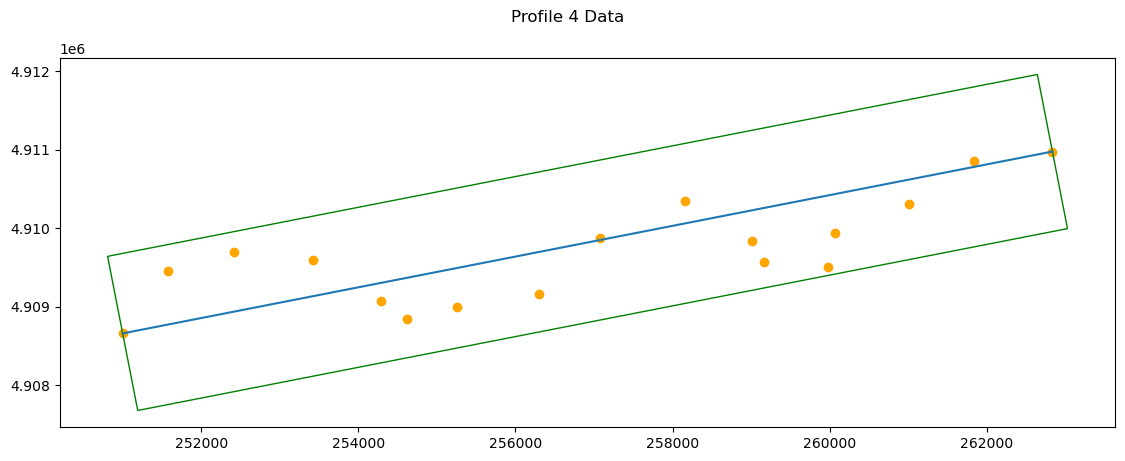

In [10]:
#%% Trim bad points from profile data

if 'badPoints' in globals(): # check if any points marked for deletion
    dfProfile.drop(index=badPoints,inplace=True) # drop rows of bad points
    dfProfile.reset_index(drop=True,inplace=True) # reset dataframe indices after dropping rows


badPoints = [] # list for averaging two colocated points
for i in range(len(dfProfile)-1): # loop through all but last row
    for j in range(i+1,len(dfProfile)): # loop through all rows after i
        if dfProfile.iloc[i,0] == dfProfile.iloc[j,0] and dfProfile.iloc[i,1] == dfProfile.iloc[j,1]: # check for two identical locations
            dfProfile.iloc[i,3] = (dfProfile.iloc[i,3]+dfProfile.iloc[j,3])/2 # average gravity of two colocated points
            badPoints.append(j) # add index of second matched point to list for deletion

if len(badPoints) > 0: # check if any points marked for deletion
    dfProfile.drop(index=badPoints,inplace=True) # drop rows of bad points
    dfProfile.reset_index(drop=True,inplace=True) # reset dataframe indices after dropping rows


fig = plt.figure() # new figure
ax = fig.add_subplot() # add plot to fig
ax.plot([sX,eX],[sY,eY]) # plot profile line
ax.scatter(dfProfile.iloc[:,0],dfProfile.iloc[:,1],color='orange') # plot grav survey points
fig.set_figwidth(16)
ax.set_aspect(1) # set aspect ratio to 1
ax.add_patch(polyPatch) # plot search area rectangle

plt.suptitle('Profile '+str(profileNum)+' Data')

fig.savefig(figSaveDir+figSaveFileName)


del(ax,badPoints,eX,eY,i,j,polyCorners,polygon,polyPatch,profileRad,sX,sY)


This section plots the gravity profile as well as an elevation profile. The data has not yet been detrended or interpolated.

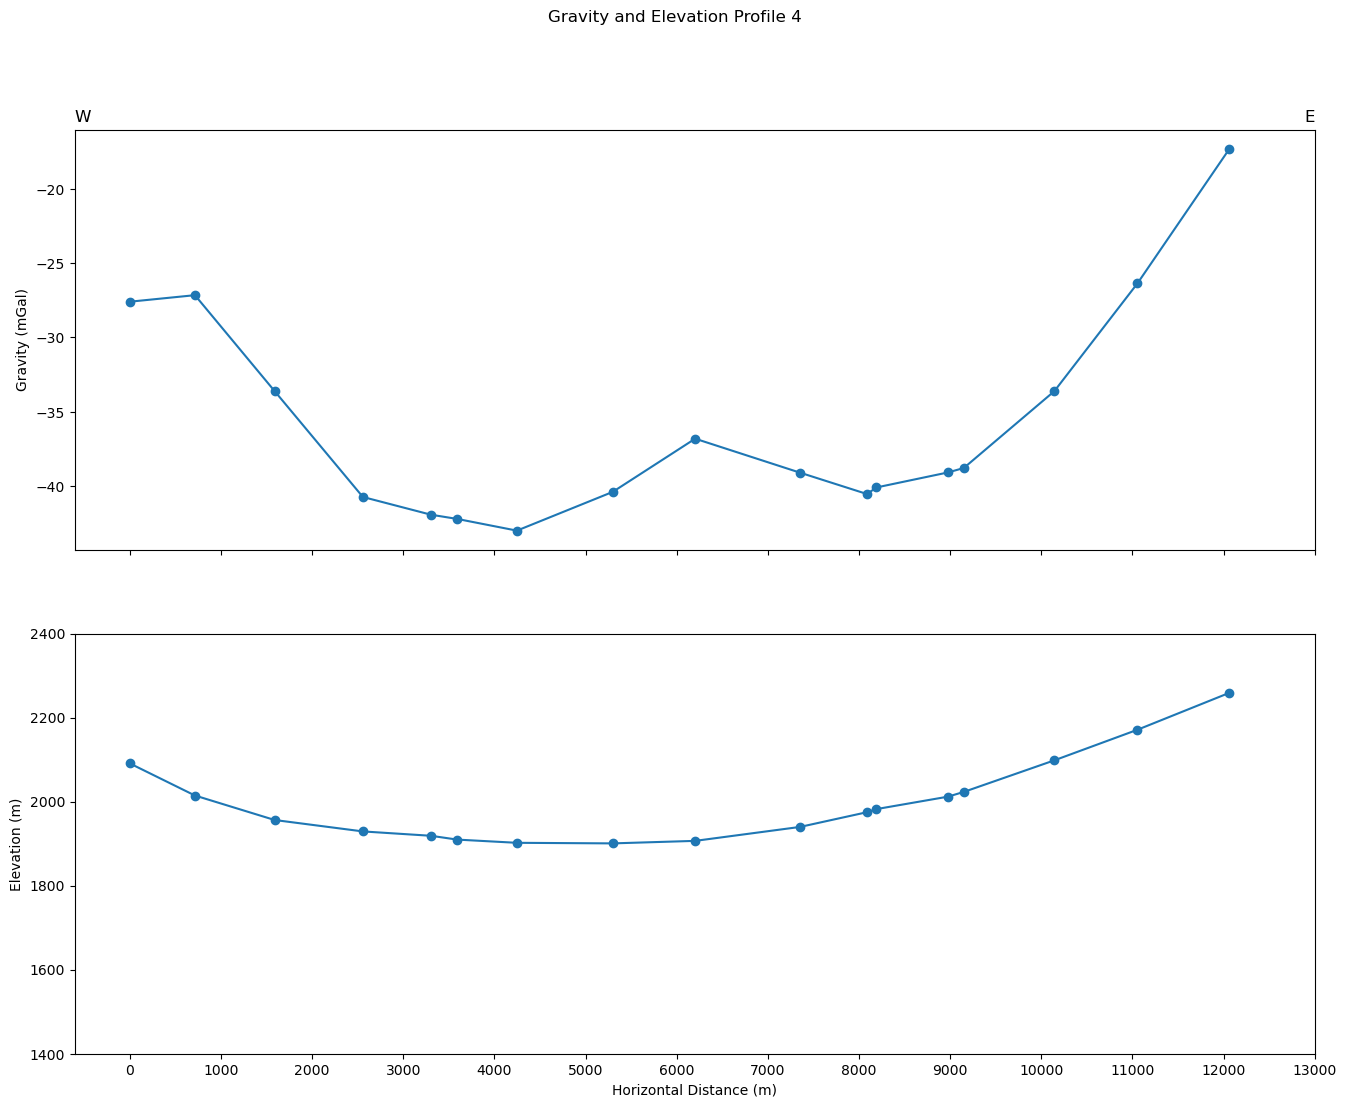

In [11]:
#%% Plot gravity and elevation profiles

profileXint = gm.roundDown(max(dfProfile.iloc[:,7])/10, 500) # set x axis intervals
#  to have at least 10 and rounded to a multiple of 500. Comment out for auto 
# labels or change to any interval you want.

fig, axs = plt.subplots(2,sharex=True) #create subplots

plt.axes(axs[0]) # gravity subplot
plt.plot(dfProfile.iloc[:,7],dfProfile.iloc[:,3],'-o')
axs[0].set_ylabel('Gravity (mGal)')
axs[0].set_title(sQuad, loc='left')
axs[0].set_title(eQuad, loc='right')

plt.axes(axs[1]) # elevation subplot
plt.plot(dfProfile.iloc[:,7],dfProfile.iloc[:,2],'-o')
axs[1].set_ylabel('Elevation (m)')
axs[1].set_ylim(1400, 2400)


axs[1].set_xlabel('Horizontal Distance (m)') # x label at bottom
if 'profileXint' in globals():
    plt.xticks(np.arange(0, max(dfProfile.iloc[:,7])+profileXint, profileXint)) # create x ticks/labels at set interval

plt.suptitle('Gravity and Elevation Profile ' + str(profileNum))

fig.set_figwidth(16)
fig.set_figheight(12)

figSaveFileName = 'GravElevProfile'+str(profileNum)+'.png' # file name for grav/elevation figure

fig.savefig(figSaveDir+figSaveFileName)


This section is for performing a linear detrend on the data. After looking at the gravity profile from the above section, pick two points on either end to set to 0 mGal. These points should be at the contact between the basin fill and surrounding bedrock. They are most likely the highest points on either side. This will only run if you have input **detrendPts**.

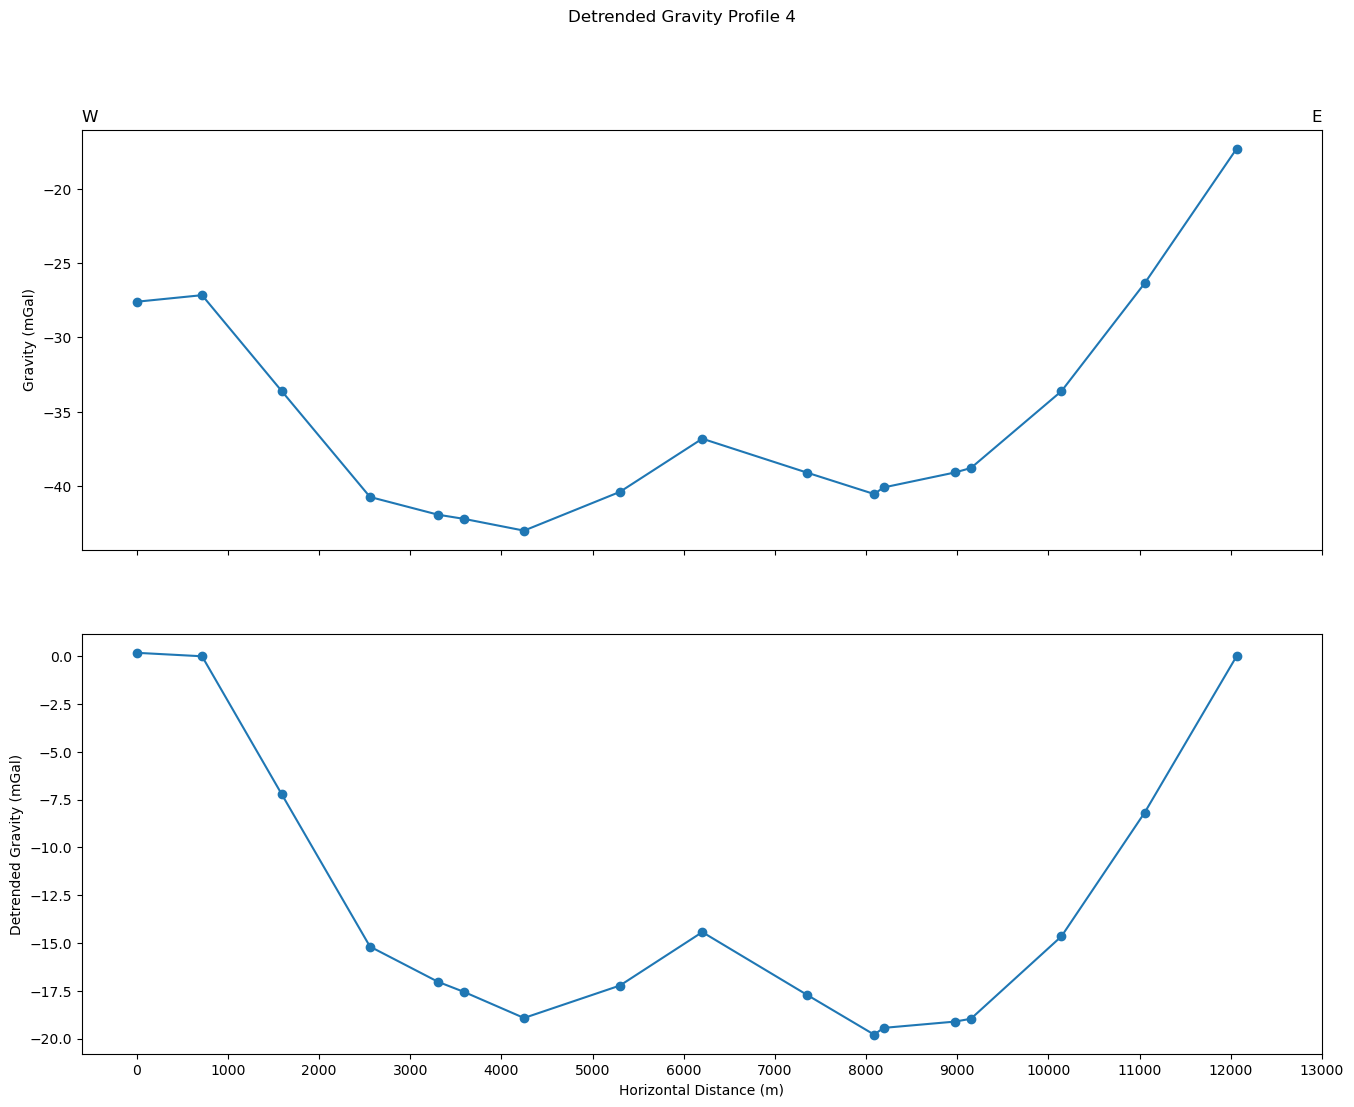

In [12]:
#%% Linear detrend profile data

# This will only run if you input a list of points to use for a linear detrend.

if 'detrendPts' in globals(): 
    dfProfileDT = dfProfile.copy()
    
    if len(detrendPts) == 2:
        slope = (dfProfile.iloc[detrendPts[1],3]-dfProfile.iloc[detrendPts[0],3])/\
            (dfProfile.iloc[detrendPts[1],7]-dfProfile.iloc[detrendPts[0],7]) # slope of detrend line
        yInt = dfProfile.iloc[detrendPts[0],3]-slope*dfProfile.iloc[detrendPts[0],7] # y intercept of detrend line
    
    elif len(detrendPts) == 1:
        slope = 0 # set slope to 0 to shift all points the same amount
        yInt = dfProfile.iloc[detrendPts[0],3] # set y intercept to y value of detrend point
        
    
    for i in range(len(dfProfile)): # loop through all gravity points
        dfProfileDT.iloc[i,3] -= slope*dfProfile.iloc[i,7]+yInt # remove linear trend from gravity data
    
    dfProfileDT.to_csv(dataSaveDir+dataSaveFileName[:-4]+'_DT.csv', index=False) # save detrended data to CSV
    
    
    fig, axs = plt.subplots(2,sharex=True) #create subplots
    
    plt.axes(axs[0])
    plt.plot(dfProfile.iloc[:,7],dfProfile.iloc[:,3],'-o')
    axs[0].set_ylabel('Gravity (mGal)')
    axs[0].set_title(sQuad, loc='left')
    axs[0].set_title(eQuad, loc='right')
    
    plt.axes(axs[1])
    plt.plot(dfProfileDT.iloc[:,7],dfProfileDT.iloc[:,3],'-o')
    axs[1].set_ylabel('Detrended Gravity (mGal)')
    
    
    axs[1].set_xlabel('Horizontal Distance (m)') # x label at bottom
    if 'profileXint' in globals():
        plt.xticks(np.arange(0, max(dfProfile.iloc[:,7])+profileXint, profileXint))
    
    plt.suptitle('Detrended Gravity Profile ' + str(profileNum))
    
    fig.set_figwidth(16)
    fig.set_figheight(12)

    figSaveFileName = 'GravProfile'+str(profileNum)+'_DT.png' # file name for detrended grav figure
    
    fig.savefig(figSaveDir+figSaveFileName)
    
    
    del(detrendPts,i,slope,yInt)


Here is where the data will be interpolated and modeled. The code will do four different interpolation methods on its own so you can easily compare them. It will only run if you have first detrended your data. It runs 10 iterations for each model to reduce the error in the model. For each method, 2 plots will be generated, 1 with the detrended and interpolated gravity profiles and the other with the interpolated gravity and modeled basin depth. Aside from the figures appearing below, they should now be saved in the Figures folder within your project directory. *Take a look at them and compare each interpolation method and their respective models.*

Interpolating linear
Interpolating akima
Interpolating pchip
Interpolating spline


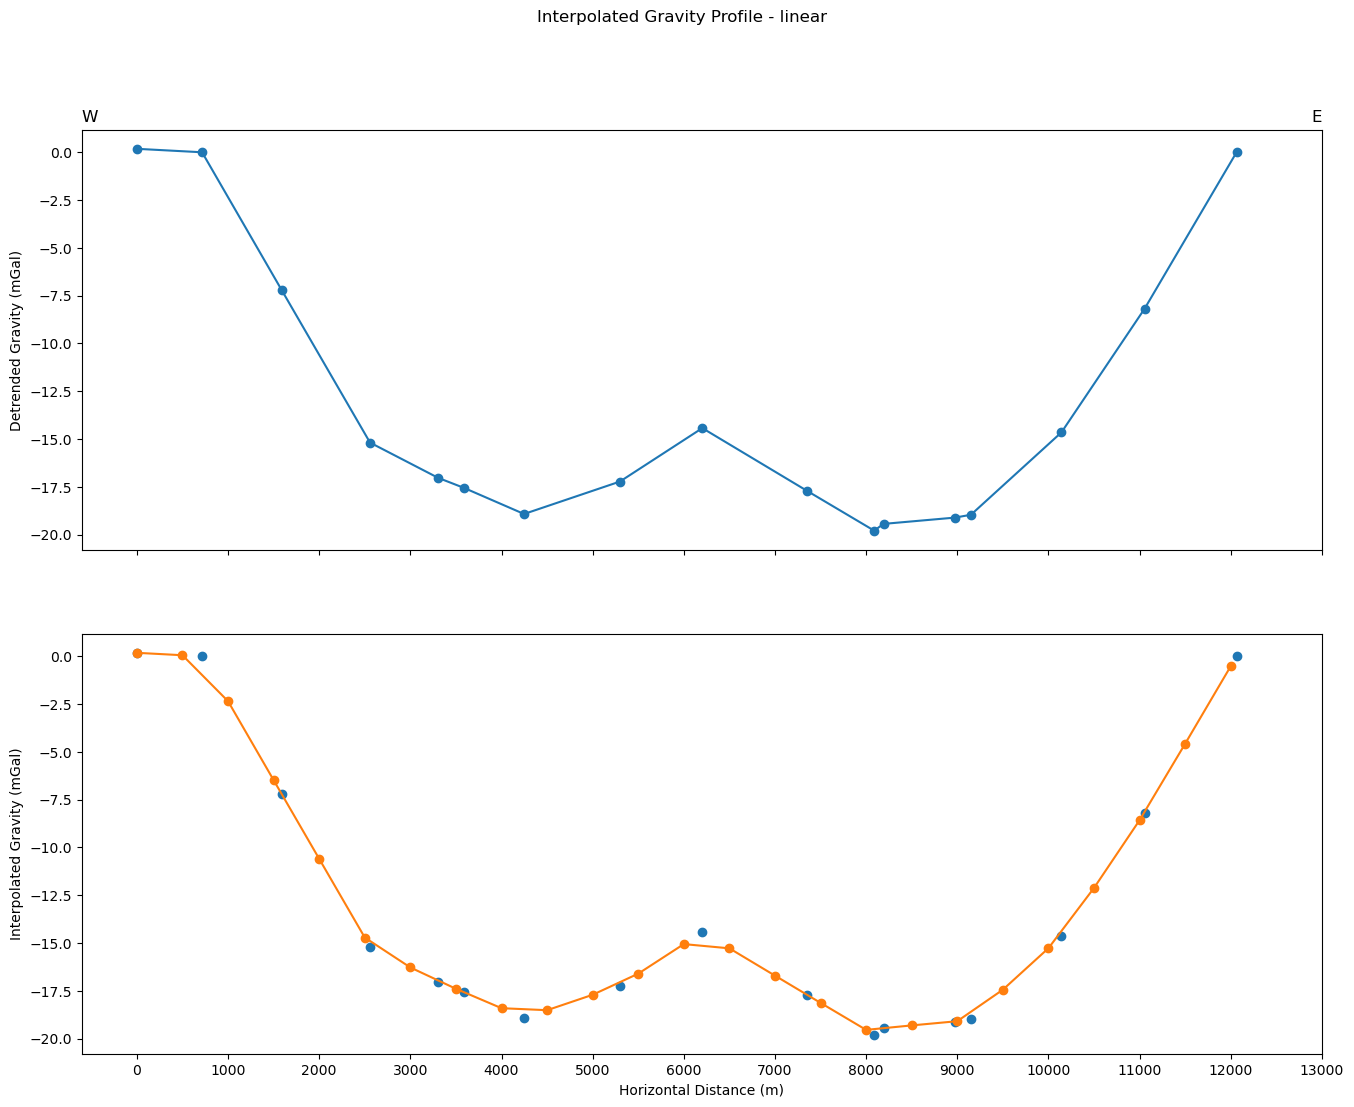

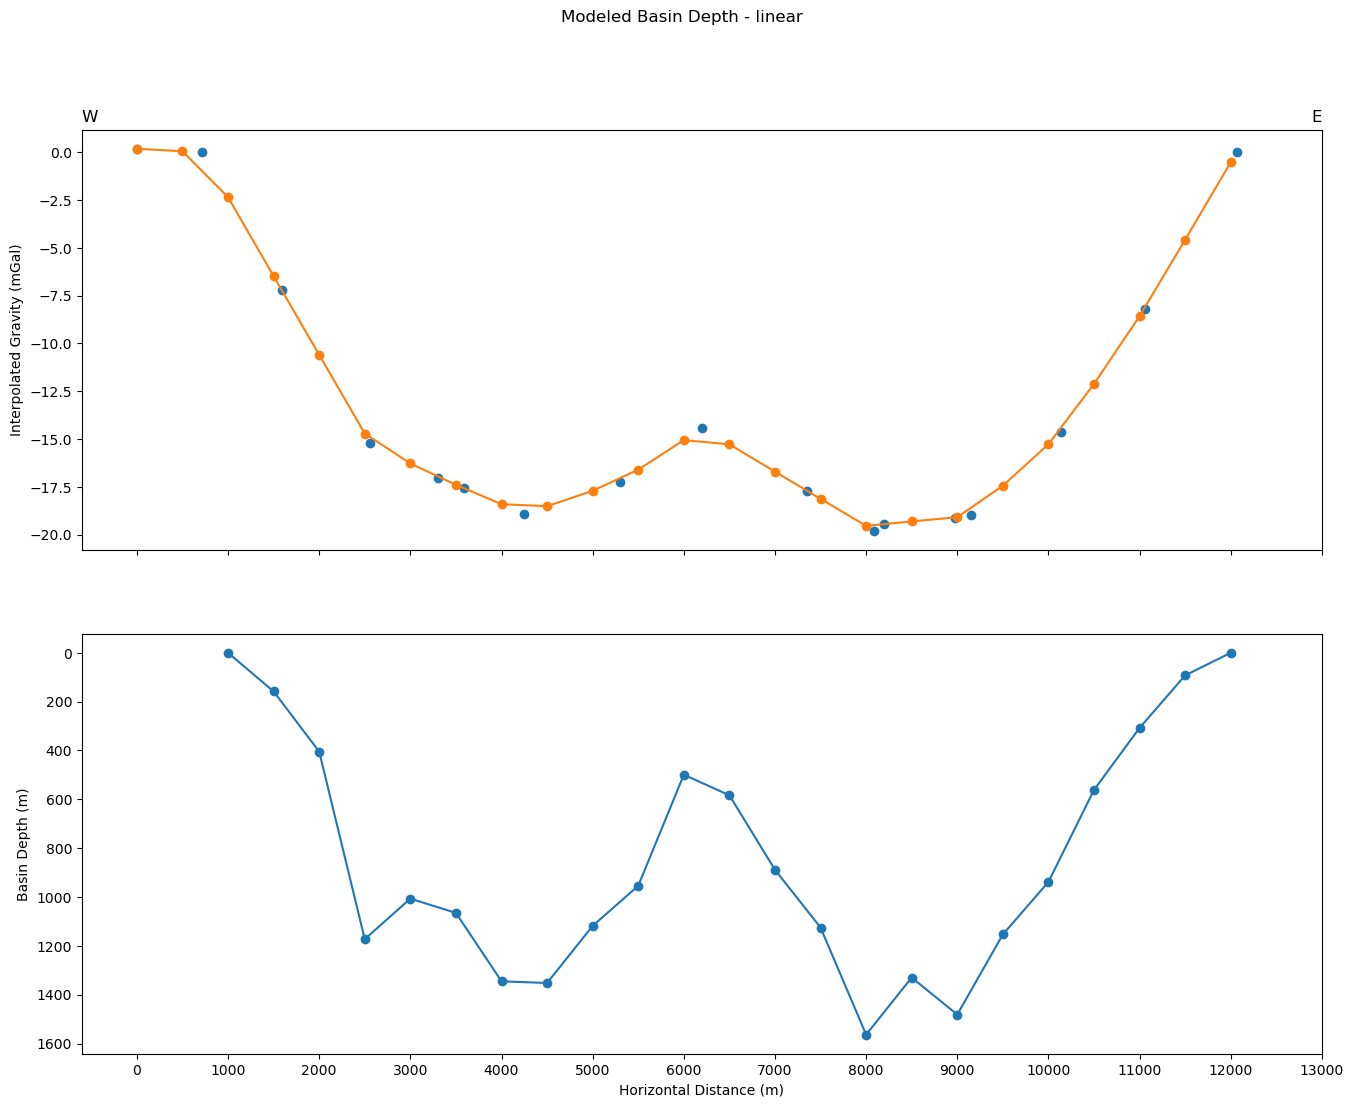

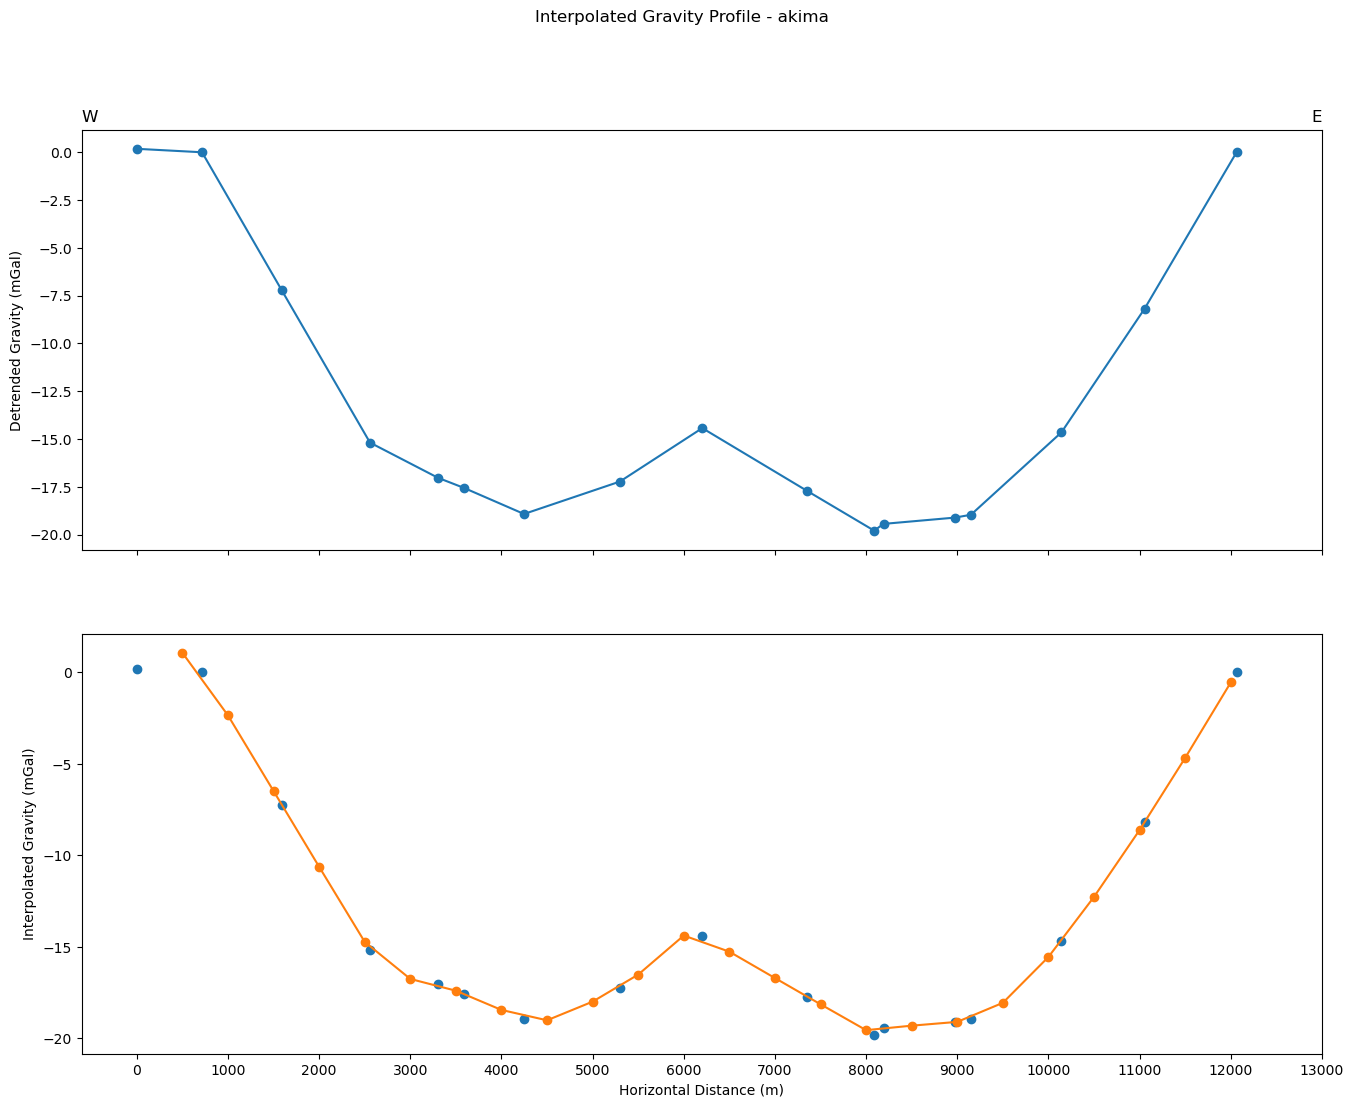

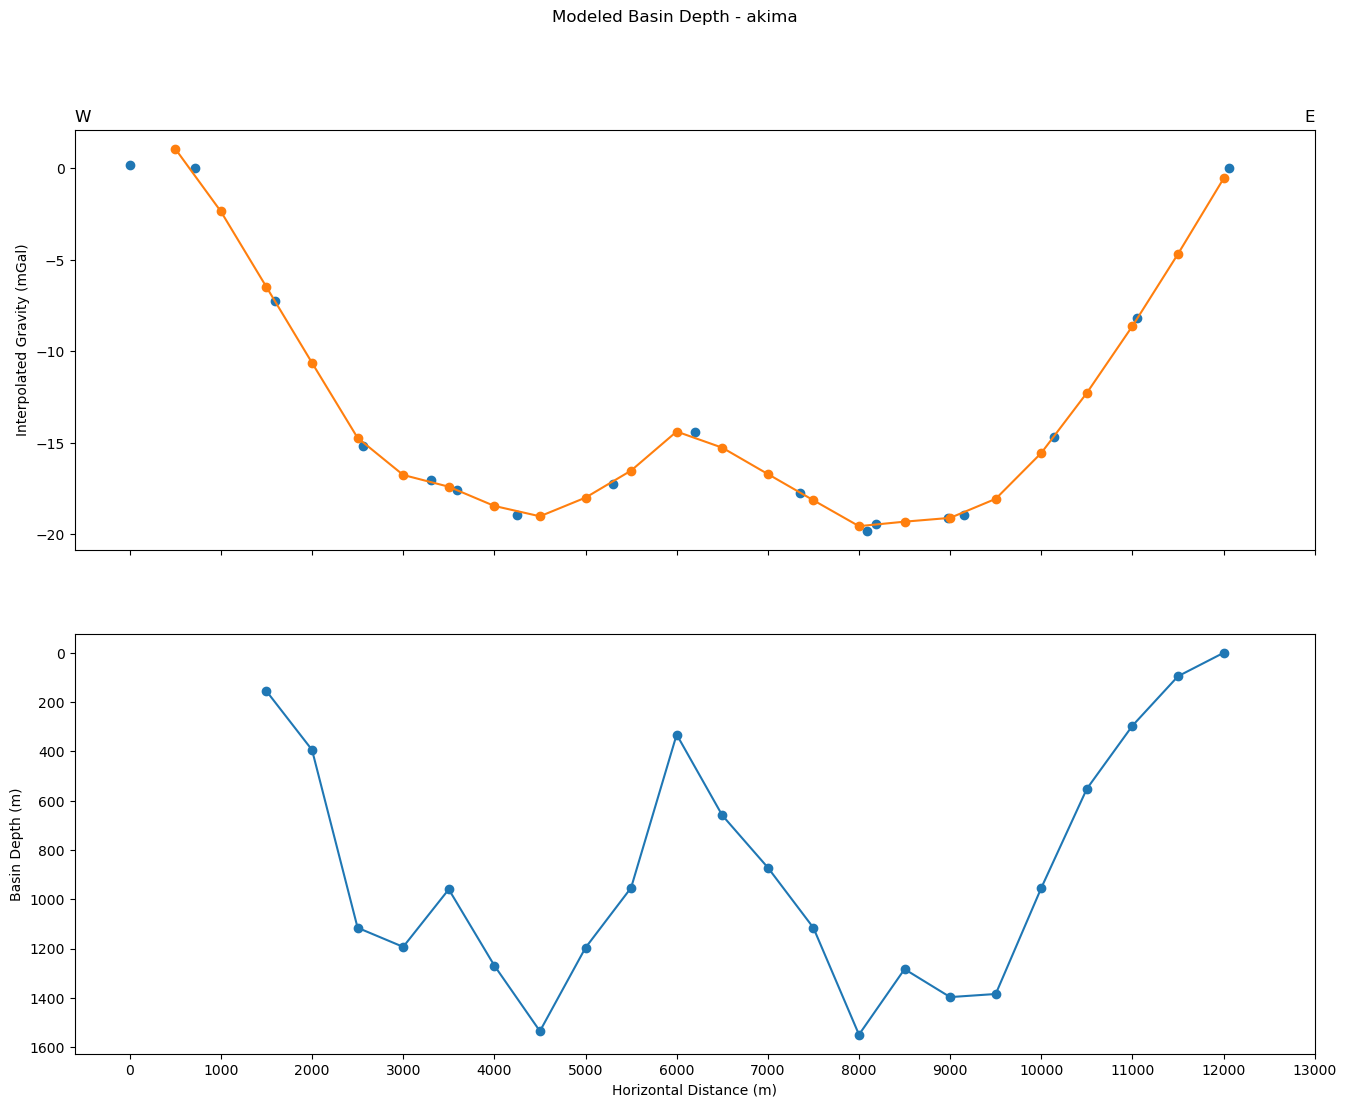

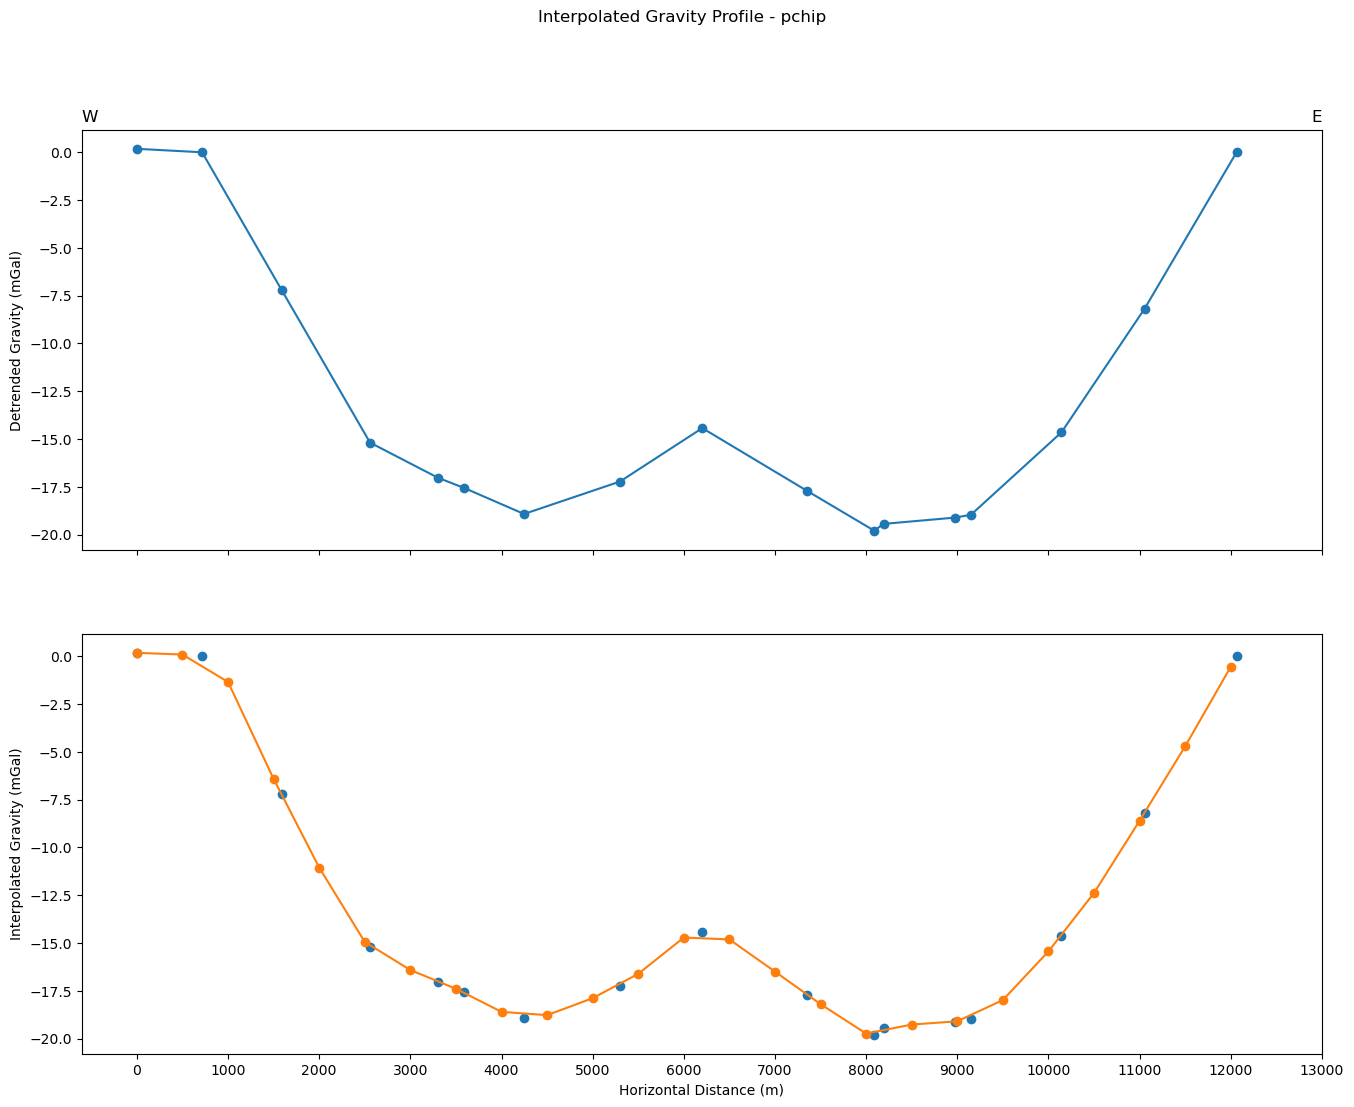

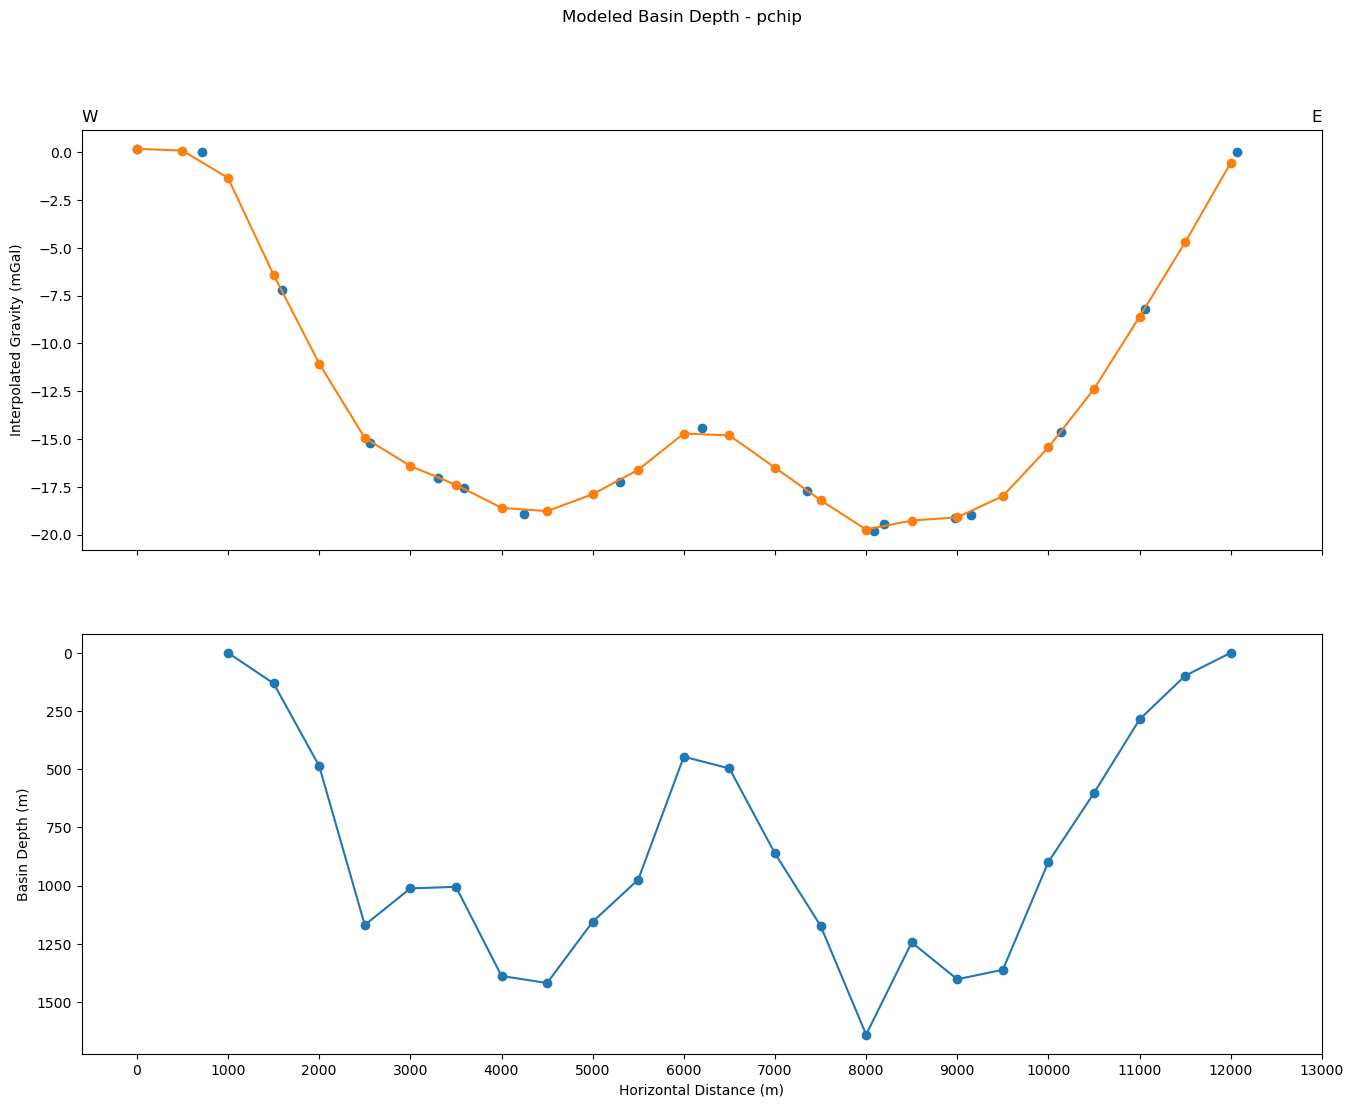

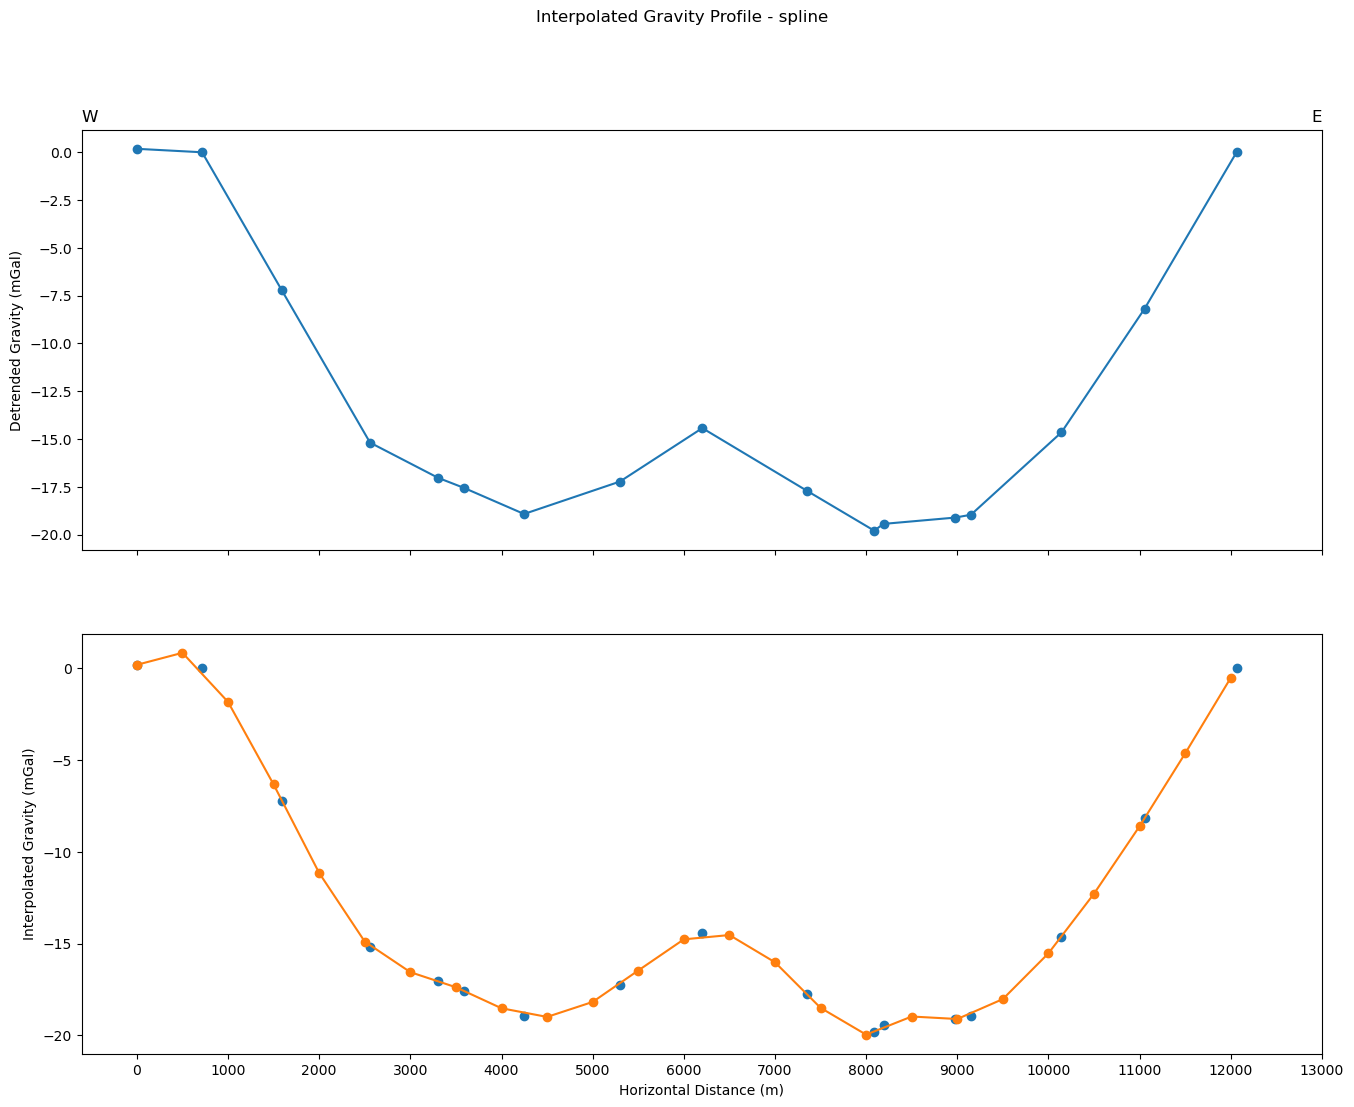

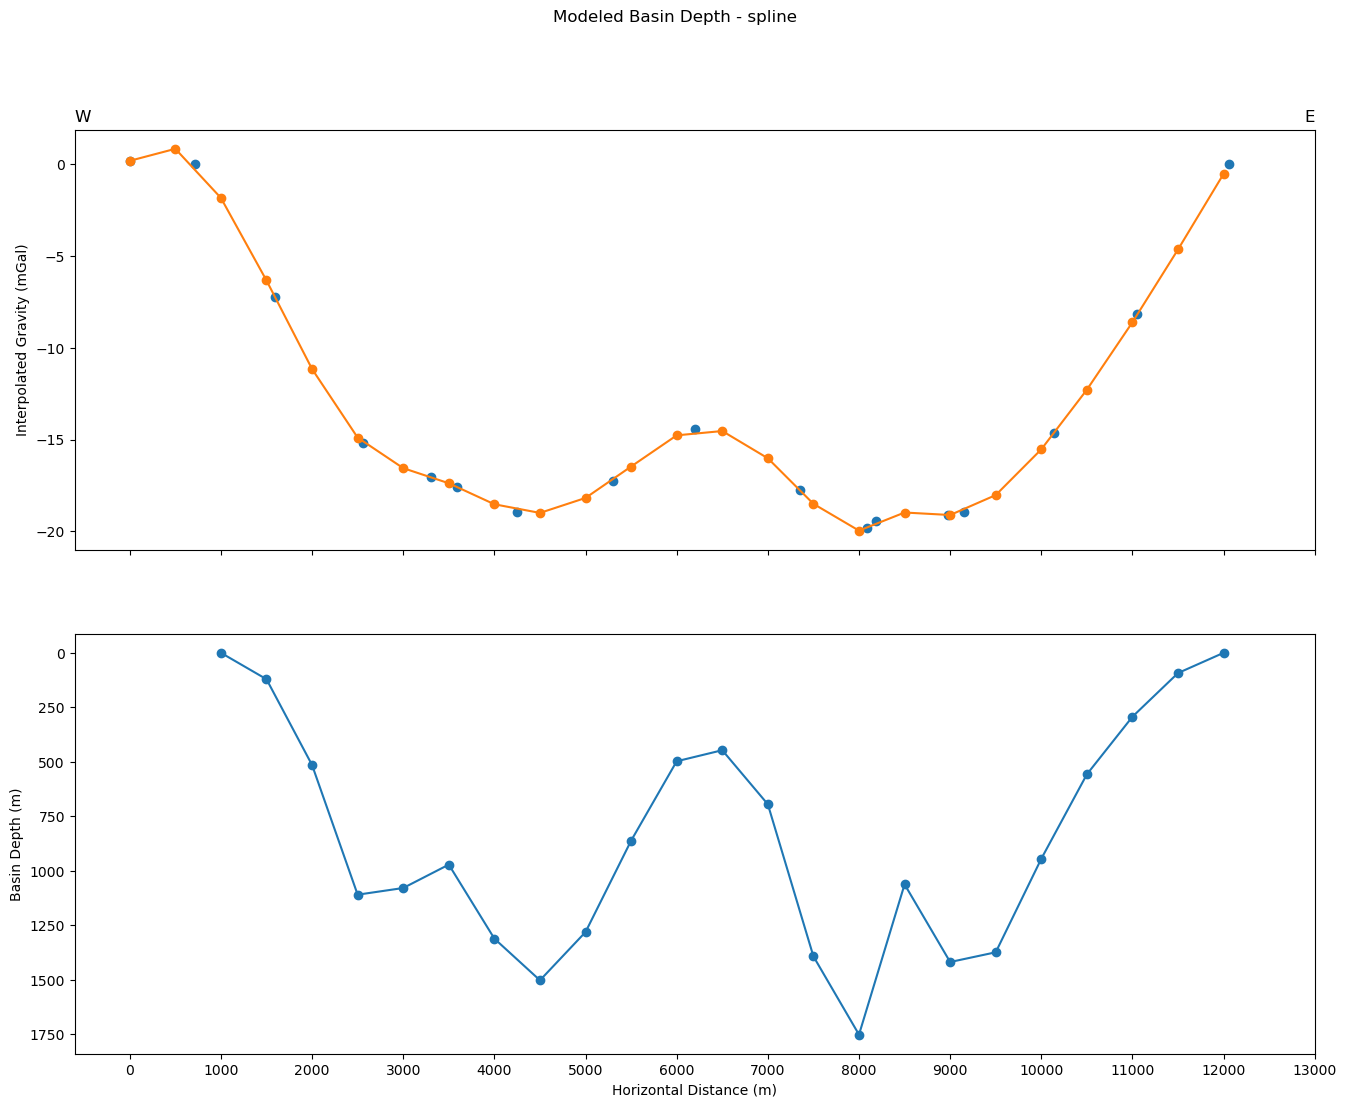

In [18]:
#%% Gravity interpolation

# This should not be done without detrending your data, so it requires the dataframe 
# produced above. After running your first model, choose your detrend points, 
# input them at the top, and run it again.
    
if 'dfProfileDT' in globals(): 
    
    y0 = 0 # y coordinate (horizontal and perpendicular to profile line) of gravity station
    methodList = ['linear','akima','pchip','spline']
    
    for method in methodList:
        
        print('Interpolating '+method)
        
        xInt = np.arange(0,dfProfileDT.iloc[-1,7],gridSpace) # create array of x values for interpolation
        
        if method == 'linear':
            gravInt = np.interp(xInt,dfProfileDT.iloc[:,7],dfProfileDT.iloc[:,3]) # linear interpolation of gravity data
        
        elif method == 'akima':
            gravInt = Akima1DInterpolator(dfProfileDT.iloc[:,7],dfProfileDT.iloc[:,3])(xInt) # interpolation using Akima1DInterpolator
        
        elif method == 'pchip':
            gravInt = PchipInterpolator(dfProfileDT.iloc[:,7],dfProfileDT.iloc[:,3])(xInt) # interpolation using PchipInterpolator
            
        elif method == 'spline':
            gravInt = CubicSpline(dfProfileDT.iloc[:,7],dfProfileDT.iloc[:,3])(xInt) # interpolation using CubicSpline
        
        data = np.vstack((xInt,gravInt)).T # create 2D numpy array of interpolated distance and gravity values
        dfProfileInt = pd.DataFrame(data,columns=['Profile Distance (m)','Interpolated Gravity (mGal)']) # create dataframe of interpolated data
        
        dfProfileInt.to_csv(dataSaveDir+dataSaveFileName[:-4]+'_Int_'+method+'.csv', index=False) # save interpolated profile data to csv
        
        
        fig, axs = plt.subplots(2,sharex=True) #create subplots
    
        plt.axes(axs[0])
        plt.plot(dfProfileDT.iloc[:,7],dfProfileDT.iloc[:,3],'-o')
        axs[0].set_ylabel('Detrended Gravity (mGal)')
        axs[0].set_title(sQuad, loc='left')
        axs[0].set_title(eQuad, loc='right')
     
        plt.axes(axs[1])
        plt.plot(dfProfileDT.iloc[:,7],dfProfileDT.iloc[:,3],'o')
        plt.plot(dfProfileInt.iloc[:,0],dfProfileInt.iloc[:,1],'-o')
        axs[1].set_ylabel('Interpolated Gravity (mGal)')
    
        
        axs[1].set_xlabel('Horizontal Distance (m)') # x label at bottom
        if 'profileXint' in globals():
            plt.xticks(np.arange(0, max(dfProfile.iloc[:,7])+profileXint, profileXint))
        plt.suptitle('Interpolated Gravity Profile - ' + method)
        
        fig.set_figwidth(16)
        fig.set_figheight(12)        
        
        figSaveFileName = 'GravProfile'+str(profileNum)+'_Int_'+method+'.png' # file name for interpolated grav figure

        fig.savefig(figSaveDir+figSaveFileName)
        
        
        del(data)
            
        
        #% Profile modeling
        
        y1 = y0-prismLength # y coordinate of left edge of prism
        y2 = y0+prismLength # y coordinate of right edge of prism
        
        dfProfileInt.dropna(inplace=True,ignore_index=True) # remove rows with NaN values in gravity column. Akima method does not interpolate at 0 m
        
        if len(dfProfileInt.columns) == 2: # add columns if necessary
            dfProfileInt.insert(loc=2,column='Thickness (m)',value=0.0) # add column to store basin thickness values
            dfProfileInt.insert(loc=3,column='Calc Grav (mGal)',value=0.0) # add column to store calculated gravity values
            dfProfileInt.insert(loc=4,column='Diff Grav (mGal)',value=0.0) # add column to store difference between observed and calculated gravity values
            dfProfileInt.insert(loc=5,column='d Thick (m)',value=0.0) # add column to store change in thickenss due to gravity difference values
        
                
        dfPrism = pd.DataFrame(np.zeros((len(dfProfileInt),1),dtype=float),columns=['X Boundary 1 (m)'])
        dfPrism.insert(loc=1,column='Y Boundary 1 (m)',value=y1)
        dfPrism.insert(loc=2,column='Prism Top (m)',value=prismTop)
        dfPrism.insert(loc=3,column='X Boundary 2 (m)',value=0.0)
        dfPrism.insert(loc=4,column='Y bounday 2 (m)',value=y2)
        dfPrism.insert(loc=5,column='Thickness (m)',value=0.0)
        dfPrism.insert(loc=6,column='Density Contrast (kg/m^3)',value=rho)
        
        
        for i in range(len(dfProfileInt)): # calculate initial basin depth using simple Bouguer
            if dfProfileInt.iloc[i,1] < 0:
                dfPrism.iloc[i,5] = gm.bouguer(dfProfileInt.iloc[i,1],rho) # calculate depth of basin in m
                dfProfileInt.iloc[i,2] = dfPrism.iloc[i,5]
            else:
                dfPrism.iloc[i,5] = 0 # set basin depth to 0 m
                dfProfileInt.iloc[i,2] = 0
        
        for i in range(len(dfPrism)): # fill prism dataframe
            dfPrism.iloc[i,0] = dfProfileInt.iloc[i,0]-gridSpace/2
            dfPrism.iloc[i,3] = dfProfileInt.iloc[i,0]+gridSpace/2
            
        dfProfileInt.to_csv(dataSaveDir+dataSaveFileName[:-4]+'_Model_'+method+'_Initial.csv', index=False) # save inital data to csv
        
        
            
        for step in range(10): # run prism calculation multiple times and adjust thickness to minimize obs-calc error
            for i in range(len(dfProfileInt)): # iterate through all observation points on the grid
                dfProfileInt.iloc[i,3] = 0 # zero out calculated gravity before running next iteration
                for j in range(len(dfPrism)): # iterate over every prism and sum gravity at OP
                    dfProfileInt.iloc[i,3] += gm.gravPrism(dfProfileInt.iloc[i,0],\
                            y0,z0,dfPrism.iloc[j,0],dfPrism.iloc[j,1],\
                            dfPrism.iloc[j,2],dfPrism.iloc[j,3],dfPrism.iloc[j,4],\
                            dfPrism.iloc[j,5],dfPrism.iloc[j,6])  
              
                dfProfileInt.iloc[i,4] = dfProfileInt.iloc[i,1]-dfProfileInt.iloc[i,3] # find the difference between calculated and observed gravity
                     
                dThick = gm.bouguer(dfProfileInt.iloc[i,4],rho) # calculate difference in thickness due to difference in gravity
                dfProfileInt.iloc[i,5] = dThick
                dfProfileInt.iloc[i,2] += dThick #adjust thickness for final maps
                dfPrism.iloc[i,5] += dThick #adjust thickness for next iteration of prism calculations
            
                if dfProfileInt.iloc[i,2] < 0: # do not allow negative thickness
                    dfProfileInt.iloc[i,2] = 0
                if dfProfileInt.iloc[i,2] > maxDepth: # do not exceed max basin depth
                    dfProfileInt.iloc[i,2] = maxDepth
                if dfPrism.iloc[i,5] < 0: # do not allow negative thickness
                    dfPrism.iloc[i,5] = 0
                if dfPrism.iloc[i,5] > maxDepth: # do not exceed max basin depth
                    dfPrism.iloc[i,5] = maxDepth
                    
                #print(str(i+1)+' of '+str(len(dfProfileInt))+' OPs complete')
            #print('Step ',step,' complete. '+ str(dt.now().time()))
            
            dfProfileInt.to_csv(dataSaveDir+dataSaveFileName[:-4]+'_Model_'+method+'_Step'+str(step)+'.csv', index=False) # save dataframe to csv
            
            
            
            
        fig, axs = plt.subplots(2,sharex=True) #create subplots
        
        plt.axes(axs[0])
        plt.plot(dfProfileDT.iloc[:,7],dfProfileDT.iloc[:,3],'o')
        plt.plot(dfProfileInt.iloc[:,0],dfProfileInt.iloc[:,1],'-o')
        axs[0].set_ylabel('Interpolated Gravity (mGal)')
        axs[0].set_title(sQuad, loc='left')
        axs[0].set_title(eQuad, loc='right')
    
        
        plt.axes(axs[1])
        plt.plot(dfProfileInt.iloc[2:,0],dfProfileInt.iloc[2:,2],'-o')
        plt.gca().invert_yaxis()
        axs[1].set_ylabel('Basin Depth (m)')
    
        
        axs[1].set_xlabel('Horizontal Distance (m)') # x label at bottom
        if 'profileXint' in globals():
            plt.xticks(np.arange(0, max(dfProfile.iloc[:,7])+profileXint, profileXint))
        plt.suptitle('Modeled Basin Depth - ' + method)
        
        fig.set_figwidth(16)
        fig.set_figheight(12)
       
        figSaveFileName = 'GravProfile'+str(profileNum)+'_Depth_'+method+'.png' # file name for interpolated grav figure
         
        fig.savefig(figSaveDir+figSaveFileName)
            
        
    del(dThick,gravInt,gridSpace,i,j,maxDepth,method,methodList,prismLength,prismTop,rho,step,\
        xInt,y0,y1,y2,z0)
    

Now that you've made your first models, change a parameter and try it again. **rho** is probably the best place to start but also try **gridSpace** and **maxDepth**.  
  
*What happens as you change each? How much does the model change for a given change in each? Does **maxDepth** always change the model or will it only change it at a certain value? What kinds of assumptions does this model make? Hint: think about the density contrast. It only uses one value for the entire basin. Is this realistic as you move laterally? Vertically?*